In [3]:
import sys
# !{sys.executable} -m pip install matplotlib
import pandas as pd
import geopy.distance
import numpy as np
from matplotlib import pyplot as plt 

In [4]:
# chosen timespans
ts1 = [1486, 1530] 
ts2 = [1531, 1560]
ts3 = [1561, 1647]
timespans = [ts1, ts2, ts3]
# book metadata
dfbooks = pd.read_json('./books.json')
dfplaces = pd.read_json('./places.json')
dfplaces.head(1)

place  longitude   latitude
0  Leipzig  12.383333  51.333333

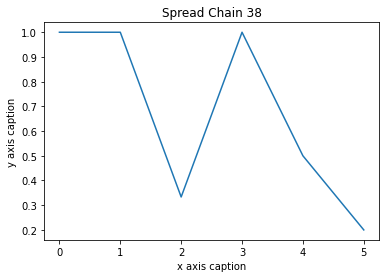

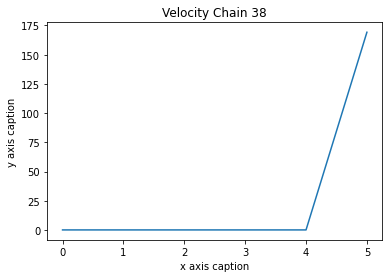

In [8]:

# book metadata
fp2 = pd.read_json('./FP Chain 38.json')
dfbooks = pd.read_json('./books.json')
dfplaces = pd.read_json('./places.json')
dfplaces.head(1)
fp1 = pd.read_json('./FP Chain 7.json')
# kimdftemp = pd.DataFrame(columns=['e1', 'e2','e1place', 'e1lat', 'e1lon', 'e2place', 'e2lat', 'e2lon'], dtype= str)

e1ids = []
e2ids = []
e1years = []
e2years = []
e1places = []
e2places = []
e1lats = []
e1lons = []
e2lats = []
e2lons = []
dists = []

for ind, row in fp2.iterrows():
    e1 = row['e1']
    e2 = row['e2']
    # get dates of chain element
    e1date = dfbooks.loc[dfbooks['custom_identifier'] == e1].reset_index(drop=True)
    e1date = e1date['year'][0]
    

    e2date = dfbooks.loc[dfbooks['custom_identifier'] == e2].reset_index(drop = True)
    e2date = e2date['year'][0]
    
    # get places
    e1place = dfbooks.loc[dfbooks['custom_identifier'] == e1].reset_index(drop=True)
    e1place = e1place['place'][0]

    e2place = dfbooks.loc[dfbooks['custom_identifier'] == e2].reset_index(drop = True)
    e2place = e2place['place'][0]
    
    # get place coordinates
    e1placerow = dfplaces.loc[dfplaces['place'] == e1place].reset_index(drop = True)
    e1lat = e1placerow['latitude'][0]
    e1lon = e1placerow['longitude'][0]

    e2placerow = dfplaces.loc[dfplaces['place'] == e2place].reset_index(drop = True)
    e2lat = e2placerow['latitude'][0]
    e2lon = e2placerow['longitude'][0]
    
    dist = geopy.distance.geodesic((e1lat, e1lon), (e2lat, e2lon)).km
    
    e1ids.append(e1)
    e2ids.append(e2)
    e1years.append(e1date)
    e2years.append(e2date)
    e1places.append(e1place)
    e2places.append(e2place)
    e1lats.append(e1lat)
    e1lons.append(e1lon)
    e2lats.append(e2lat)
    e2lons.append(e2lon)
    dists.append(dist)

#     kimdftemp = pd.DataFrame(columns=['e1', 'e2'], dtype= int)
#     kimdftemp.append(e1date, ignore_index = True)

# fulldata = [e1ids, e1years, e1places, e1lats, e1lons, e2ids, e1years, e2places, e2lats, e2lons]
# frame = pd.DataFrame(data = fulldata, columns= ['e1ids', 'e1years', 'e1places', 'e1lats', 'e1lons', 'e2ids', 'e1years', 'e2places', 'e2lats', 'e2lons'])
frame = pd.DataFrame(zip(e1ids, e1years, e1places, e1lats, e1lons, e2ids, e2years, e2places, e2lats, e2lons, dists), columns= ['e1ids', 'e1years', 'e1places', 'e1lats', 'e1lons', 'e2ids', 'e2years', 'e2places', 'e2lats', 'e2lons', 'dists'])

# frame.to_csv('file_name.csv', encoding='utf-8')

def velocity_calc(distance, yearsecond, yearfirst):
    if yearsecond > yearfirst:
        velocity = distance/(yearsecond-yearfirst)
    else:
        velocity = distance/1
#         travel in just one year
    return velocity

def spread_calc(yearsecond, yearfirst):
    if yearsecond > yearfirst:
        spread = 1/(yearsecond-yearfirst)
    else:
        spread = 1
#         travel in just one year
    return spread


frame['velocity'] = frame.apply(lambda row: velocity_calc(row.dists, row.e2years, row.e1years), axis=1)
frame['spread'] = frame.apply(lambda row: spread_calc(row.e2years, row.e1years), axis=1)




# x = frame['e2years']
x = frame.index
y = frame['spread']
plt.title("Spread Chain 38") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()


# x = frame['e2years']
x = frame.index
y = frame['velocity']
plt.title("Velocity Chain 38") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

frame
frame.to_csv('chain38accel.csv', encoding='utf-8', index=False)

# accelerationframe = pd.Dataframe

# def acceleration(frame):
#     for i in range(1, len(frame)):
#         acceleration = frame.loc[i, 'velocity']-frame.loc[i-1, 'velocity']/
    



    
#     print(e1, ': year', e1date, '|', e2, ': year', e2date)
#     print(e1place, e1lat, e1lon, e2place, e2lat, e2lon)
    




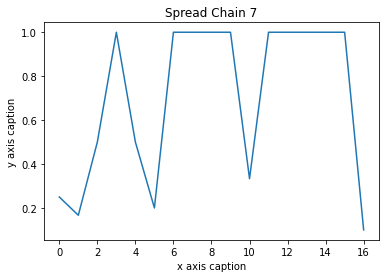

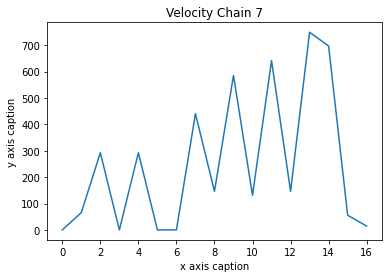

e1ids  e1years       e1places     e1lats     e1lons  e2ids  e2years  \
0    1807     1581           Rome  41.893056  12.482778   1808     1585   
1    1808     1585           Rome  41.893056  12.482778   1809     1591   
2    1809     1591         Venice  45.439722  12.331944   1746     1593   
3    1746     1593           Lyon  45.758889   4.841389   1810     1594   
4    1810     1594           Lyon  45.758889   4.841389   1811     1596   
5    1811     1596         Venice  45.439722  12.331944   1812     1601   
6    1812     1601         Venice  45.439722  12.331944   2278     1601   
7    2278     1601         Venice  45.439722  12.331944   1821     1602   
8    1821     1602  Saint Gervais  45.892500   6.713611   1813     1602   
9    1813     1602           Lyon  45.758889   4.841389   1814     1603   
10   1814     1603         Venice  45.439722  12.331944   1815     1606   
11   1815     1606           Rome  41.893056  12.482778   1755     1607   
12   1755     1607  Saint Gervais  45.892500   6.713611   1816     1607   
13   1816     1607           Lyon  45.758889   4.841389   1817     1607   
14   1817     1607           Rome  41.893056  12.482778   2151     1607   
15   2151     1607         Geneva  46.200000   6.150000   1818     1608   
16   1818     1608  Saint Gervais  45.892500   6.713611   1822     1618   

         e2places     e2lats     e2lons       dists    velocity    spread  
0            Rome  41.893056  12.482778    0.000000    0.000000  0.250000  
1          Venice  45.439722  12.331944  394.242576   65.707096  0.166667  
2            Lyon  45.758889   4.841389  585.277538  292.638769  0.500000  
3            Lyon  45.758889   4.841389    0.000000    0.000000  1.000000  
4          Venice  45.439722  12.331944  585.277538  292.638769  0.500000  
5          Venice  45.439722  12.331944    0.000000    0.000000  0.200000  
6          Venice  45.439722  12.331944    0.000000    0.000000  1.000000  
7   Saint Gervais  45.892500   6.713611  440.613722  440.613722  1.000000  
8            Lyon  45.758889   4.841389  146.235779  146.235779  1.000000  
9          Venice  45.439722  12.331944  585.277538  585.277538  1.000000  
10           Rome  41.893056  12.482778  394.242576  131.414192  0.333333  
11  Saint Gervais  45.892500   6.713611  641.824589  641.824589  1.000000  
12           Lyon  45.758889   4.841389  146.235779  146.235779  1.000000  
13           Rome  41.893056  12.482778  749.340478  749.340478  1.000000  
14         Geneva  46.200000   6.150000  697.148612  697.148612  1.000000  
15  Saint Gervais  45.892500   6.713611   55.417914   55.417914  1.000000  
16           Lyon  45.758889   4.841389  146.235779   14.623578  0.100000

In [136]:

# book metadata
fp1 = pd.read_json('./FP Chain 13.json')
dfbooks = pd.read_json('./books.json')
dfplaces = pd.read_json('./places.json')
dfplaces.head(1)
fp2 = pd.read_json('./FP Chain 7.json')
# kimdftemp = pd.DataFrame(columns=['e1', 'e2','e1place', 'e1lat', 'e1lon', 'e2place', 'e2lat', 'e2lon'], dtype= str)

e1ids = []
e2ids = []
e1years = []
e2years = []
e1places = []
e2places = []
e1lats = []
e1lons = []
e2lats = []
e2lons = []
dists = []

for ind, row in fp2.iterrows():
    e1 = row['e1']
    e2 = row['e2']
    # get dates of chain element
    e1date = dfbooks.loc[dfbooks['custom_identifier'] == e1].reset_index(drop=True)
    e1date = e1date['year'][0]
    

    e2date = dfbooks.loc[dfbooks['custom_identifier'] == e2].reset_index(drop = True)
    e2date = e2date['year'][0]
    
    # get places
    e1place = dfbooks.loc[dfbooks['custom_identifier'] == e1].reset_index(drop=True)
    e1place = e1place['place'][0]

    e2place = dfbooks.loc[dfbooks['custom_identifier'] == e2].reset_index(drop = True)
    e2place = e2place['place'][0]
    
    # get place coordinates
    e1placerow = dfplaces.loc[dfplaces['place'] == e1place].reset_index(drop = True)
    e1lat = e1placerow['latitude'][0]
    e1lon = e1placerow['longitude'][0]

    e2placerow = dfplaces.loc[dfplaces['place'] == e2place].reset_index(drop = True)
    e2lat = e2placerow['latitude'][0]
    e2lon = e2placerow['longitude'][0]
    
    dist = geopy.distance.geodesic((e1lat, e1lon), (e2lat, e2lon)).km
    
    e1ids.append(e1)
    e2ids.append(e2)
    e1years.append(e1date)
    e2years.append(e2date)
    e1places.append(e1place)
    e2places.append(e2place)
    e1lats.append(e1lat)
    e1lons.append(e1lon)
    e2lats.append(e2lat)
    e2lons.append(e2lon)
    dists.append(dist)

#     kimdftemp = pd.DataFrame(columns=['e1', 'e2'], dtype= int)
#     kimdftemp.append(e1date, ignore_index = True)

# fulldata = [e1ids, e1years, e1places, e1lats, e1lons, e2ids, e1years, e2places, e2lats, e2lons]
# frame = pd.DataFrame(data = fulldata, columns= ['e1ids', 'e1years', 'e1places', 'e1lats', 'e1lons', 'e2ids', 'e1years', 'e2places', 'e2lats', 'e2lons'])
frame = pd.DataFrame(zip(e1ids, e1years, e1places, e1lats, e1lons, e2ids, e2years, e2places, e2lats, e2lons, dists), columns= ['e1ids', 'e1years', 'e1places', 'e1lats', 'e1lons', 'e2ids', 'e2years', 'e2places', 'e2lats', 'e2lons', 'dists'])

# frame.to_csv('file_name.csv', encoding='utf-8')

def velocity_calc(distance, yearsecond, yearfirst):
    if yearsecond > yearfirst:
        velocity = distance/(yearsecond-yearfirst)
    else:
        velocity = distance/1
#         travel in just one year
    return velocity

def spread_calc(yearsecond, yearfirst):
    if yearsecond > yearfirst:
        spread = 1/(yearsecond-yearfirst)
    else:
        spread = 1
#         travel in just one year
    return spread


frame['velocity'] = frame.apply(lambda row: velocity_calc(row.dists, row.e2years, row.e1years), axis=1)
frame['spread'] = frame.apply(lambda row: spread_calc(row.e2years, row.e1years), axis=1)




# x = frame['e2years']
x = frame.index
y = frame['spread']
plt.title("Spread Chain 7") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()


# x = frame['e2years']
x = frame.index
y = frame['velocity']
plt.title("Velocity Chain 7") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()



frame
# frame.to_csv('chain13accel.csv', encoding='utf-8')

# accelerationframe = pd.Dataframe

# def acceleration(frame):
#     for i in range(1, len(frame)):
#         acceleration = frame.loc[i, 'velocity']-frame.loc[i-1, 'velocity']/
    



    
#     print(e1, ': year', e1date, '|', e2, ': year', e2date)
#     print(e1place, e1lat, e1lon, e2place, e2lat, e2lon)
    




In [67]:
# check dates of FP2
# fp2 = pd.read_json('./FP Chain 3.json')
# for ind, row in fp2.iterrows():
#     e1 = row['e1']
#     e2 = row['e2']
#     # get dates of chain element
#     e1date = dfbooks.loc[dfbooks['custom_identifier'] == e1].reset_index(drop=True)
#     e1date = e1date['year'][0]

#     e2date = dfbooks.loc[dfbooks['custom_identifier'] == e2].reset_index(drop = True)
#     e2date = e2date['year'][0]

#     print(e1, ': year', e1date, '|', e2, ': year', e2date)


1925 : year 1490 | 1926 : year 1491
1926 : year 1491 | 1930 : year 1501
1930 : year 1501 | 1650 : year 1513
1650 : year 1513 | 1942 : year 1519
1942 : year 1519 | 1883 : year 1537
1883 : year 1537 | 1884 : year 1537
1884 : year 1537 | 1682 : year 1541
1682 : year 1541 | 1687 : year 1545


In [65]:
get_speed(fp2,dfbooks,dfplaces)

Rome
Rome
1807 : year 1581 | 1808 : year 1585
41.893055555 12.482777777
  place  longitude   latitude
0  Rome  12.482778  41.893056
hello


place  longitude   latitude
0            Leipzig  12.383333  51.333333
1             Venice  12.331944  45.439722
2              Paris   2.351389  48.856944
3            Cologne   6.957778  50.942222
4          Nuremberg  11.077778  49.452778
5         Strasbourg   7.752222  48.573333
6         Wittenberg  12.648400  51.867100
7            Antwerp   4.399722  51.221111
8             Leuven   4.704444  50.877500
9   Frankfurt (Main)   8.679722  50.113611
10           Seville  -5.983333  37.383333
11              Lyon   4.841389  45.758889
12        Valladolid  -4.728561  41.651981
13           Perugia  12.388800  43.112100
14            London  -0.127500  51.507222
15              Rome  12.482778  41.893056
16     Saint Gervais   6.713611  45.892500
17            Geneva   6.150000  46.200000
18             Dijon   5.041944  47.323056
19            Leiden   4.494722  52.154444